<a href="https://colab.research.google.com/github/hcc7402/Phys503-Work-Campos/blob/main/homework_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 01: Numerical python and data handling

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import os.path
import subprocess
#check
#save check2

In [2]:
def wget_data(url):
    local_path='./tmp_data'
    subprocess.run(["wget", "-nc", "-P", local_path, url])

In [3]:
def locate_data(name, check_exists=True):
    local_path='./tmp_data'
    path = os.path.join(local_path, name)
    if check_exists and not os.path.exists(path):
        raise RuxntimeError('No such data file: {}'.format(path))
    return path

## <span style="color:Orange">Problem 1</span>

Use `np.einsum` to evaluate the tensor expression $g^{il} \Gamma^m_{ki} x^k$ which arises in [contravariant derivatives in General Relativity](https://en.wikipedia.org/wiki/Christoffel_symbols#Covariant_derivatives_of_tensors).  Note we are using the GR convention that repeated indices (k,l) are summed over.

In [16]:
def tensor_expr(g, Gamma, x, D=4):
    """Evaluate the tensor expression above.

    Parameters
    ----------
    g : array
        Numpy array of shape (D, D)
    Gamma : array
        Numpy array of shape (D, D, D)
    x : array
        Numpy array of shape (D,)
    D : int
        Dimension of input tensors.

    Returns
    -------
    array
        Numpy array of shape (D, D) that evaluates the tensor expression.
    """
    assert g.shape == (D, D)
    assert Gamma.shape == (D, D, D)
    assert x.shape == (D,)

    # YOUR CODE HERE
    return np.einsum('il,mki,k', g, Gamma, x)   #simple matrix multiplication

    raise NotImplementedError()

In [17]:
# A correct solution should pass these tests.
g = np.arange(4 ** 2).reshape(4, 4)
Gamma = np.arange(4 ** 3).reshape(4, 4, 4)
x = np.arange(4)
y = tensor_expr(g, Gamma, x)
assert np.array_equal(
    y,
    [[ 1680,  3984,  6288,  8592], [ 1940,  4628,  7316, 10004],
     [ 2200,  5272,  8344, 11416], [ 2460,  5916,  9372, 12828]])

## <span style="color:Orange">Problem 2</span>

Use `np.histogram` to calculate the fraction of values in an arbitrary input data array that lie in each of the 10 intervals \[0.0, 0.1), \[0.1, 0.2), ..., \[0.9, 1.0). You can assume that all input values are in the range \[0,1). This is a useful technique to estimate the probability density that the data was sampled from.

In [47]:
def estimate_probability_density(data, bins):
    """Estimate the probability density of arbitrary data.

    Parameters
    ----------
    data : array
        1D numpy array of random values.
    bins : array
        1D numpy array of N+1 bin edges to use. Must be increasing.

    Returns
    -------
    array
        1D numpy array of N probability densities.
    """
    assert np.all(np.diff(bins) > 0)

    # YOUR CODE HERE
    plt.hist(data, bins)
    hist, bin_edges = np.histogram(data,bins)
    print(hist)
    print(hist.sum())

    return hist
    raise NotImplementedError()

[ 6  8  7 17 11 13 16  9  8  5]
100


AssertionError: 

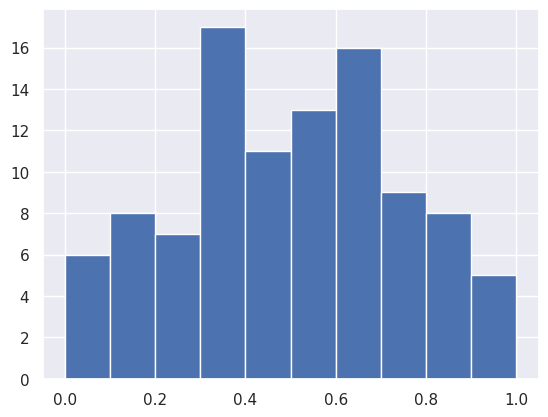

In [48]:
# A correct solution should pass these tests.
generator = np.random.RandomState(seed=123)
data = generator.uniform(size=100)
bins = np.linspace(0., 1., 11)
rho = estimate_probability_density(data, bins)
assert np.allclose(0.1 * rho.sum(), 1.)
assert np.allclose(rho, [ 0.6,  0.8,  0.7,  1.7,  1.1,  1.3,  1.6,  0.9,  0.8,  0.5])

## <span style="color:Orange">Problem 3</span>

Define a function to calculate the [entropy](https://en.wikipedia.org/wiki/Entropy_estimation) $H(\rho)$ of a binned probability density, defined as:
$$
H(\rho) \equiv -\sum_i \rho_i \log(\rho_i) \Delta w_i \; ,
$$
where $\rho_i$ is the binned density in bin $i$ with width $w_i$.

In [ ]:
def binned_entropy(rho, bins):
    """Calculate the binned entropy.

    Parameters
    ----------
    rho : array
        1D numpy array of densities, e.g., calculated by the previous function.
    bins : array
        1D numpy array of N+1 bin edges to use. Must be increasing.

    Returns
    -------
    float
        Value of the binned entropy.
    """
    assert np.all(np.diff(bins) > 0)

    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# A correct solution should pass these tests.
generator = np.random.RandomState(seed=123)
data1 = generator.uniform(size=10000)
data2 = generator.uniform(size=10000) ** 4
bins = np.linspace(0., 1., 11)
rho1 = estimate_probability_density(data1, bins)
rho2 = estimate_probability_density(data2, bins)
H1 = binned_entropy(rho1, bins)
H2 = binned_entropy(rho2, bins)
assert np.allclose(H1, -0.000801544)
assert np.allclose(H2, -0.699349908)

## <span style="color:Orange">Problem 4</span>

Define a function that reads `pong_data.hf5` and returns a new subset DataFrame containing only the columns `x5`, `y5`, `x7`, `y7` (**in that order**) and only the last 200 rows.

In [ ]:
wget_data('https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/data/pong_data.hf5')

In [ ]:
def create_subset():
    """Read pong_data.hf5 and return a subset.
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# A correct solution should pass these tests.
subset = create_subset()
assert np.array_equal(subset.columns.values, ('x5', 'y5', 'x7', 'y7'))
assert len(subset) == 200
summary = subset.describe()
assert np.allclose(summary.loc['mean', :].values,
                   [ 0.43564752,  0.30610958,  0.57520991,  0.21383226])

## <span style="color:Orange">Acknowledgments</span>

* Initial version: Mark Neubauer

© Copyright 2025